In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel

In [2]:
df = pd.read_excel('/Users/shouyuling/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Postdoc/Projects/Gensight/Data/VEPTask/Results/AllSub_results_HCP.xlsx')
df

,Subjid,Task,ElecGroup,Condition,FreqGroup,Stimuli,Accuracy
0,HCP001,VEP,All_electrodes,12Hz,1to40,Control,72.222222
1,HCP001,VEP,All_electrodes,12Hz,1to40,Disc,33.333333
2,HCP001,VEP,All_electrodes,12Hz,1to40,VerticalBar,44.444444
3,HCP001,VEP,All_electrodes,12Hz,1to40,HorizontalBar,61.111111
4,HCP001,VEP,All_electrodes,12Hz,1to40,All,52.777778
5,HCP002,VEP,All_electrodes,12Hz,1to40,Control,45.238095
6,HCP002,VEP,All_electrodes,12Hz,1to40,Disc,59.523810
7,HCP002,VEP,All_electrodes,12Hz,1to40,VerticalBar,59.090909
8,HCP002,VEP,All_electrodes,12Hz,1to40,HorizontalBar,53.488372
9,HCP002,VEP,All_electrodes,12Hz,1to40,All,54.335296


In [3]:
df.dtypes

Subjid        object
Task          object
ElecGroup     object
Condition     object
FreqGroup     object
Stimuli       object
Accuracy     float64
dtype: object

/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('2').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('3').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('1').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/Users/shouyuling/L

One-sample t-test for GogglesON: t-statistic = 7.734991821537107, p-value = 0.0007522730272966225


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


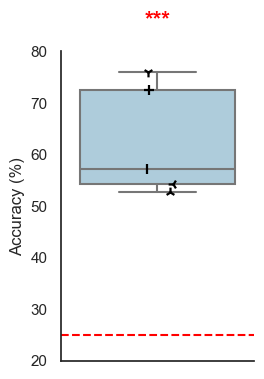

In [4]:
sns.set_theme(style="white",palette='Paired')

plt.close()
data=df[(df['Stimuli']=='All')]
g = sns.catplot(data=data,kind='box',showfliers=False,
            y='Accuracy',
            #x='Condition',#order=['12Hz','6Hz'],
            palette='Paired',
            height=4, aspect=.7)
# Define custom markers for each subject
unique_subjects = data['Subjid'].unique()
markers = ['2', '3', '1', '+', '|']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

# Overlay each subject with its custom marker
for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='Accuracy',
        marker=marker, color='none', edgecolor='gray', linewidth=1.6, dodge=True, ax=g.ax, size=7
    )

# Remove the additional legends created by stripplot
handles, labels = g.ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

t_stat, p_val = ttest_1samp(data['Accuracy'], 25, alternative='greater')
# Determine significance level for annotation
if p_val < 0.001:
    star = '***'
elif p_val < 0.01:
    star = '**'
elif p_val < 0.05:
    star = '*'
elif p_val < 0.1:
    star = '+'

print(f"One-sample t-test for {'GogglesON'}: t-statistic = {t_stat}, p-value = {p_val}")

# Annotate the plot with the results
g.ax.text(
    0, 85, f"{star}", horizontalalignment='center', color='red', fontsize=16, fontweight='bold'
)


g.set(ylim=[20,80])
#g.set(yticks=[20,25,30,35,40])
g.refline(y=25,color='red')
g.set_ylabels('Accuracy (%)',fontsize=12)
#g._legend.remove()

plt.show()

In [5]:
ttest_1samp(data[data['Subjid']!='TEST']['Accuracy'],25)

TtestResult(statistic=7.734991821537107, pvalue=0.001504546054593245, df=4)

In [6]:
data['Accuracy']

4     52.777778
9     54.335296
14    76.074332
19    72.442085
24    57.239756
Name: Accuracy, dtype: float64

In [7]:
df

,Subjid,Task,ElecGroup,Condition,FreqGroup,Stimuli,Accuracy
0,HCP001,VEP,All_electrodes,12Hz,1to40,Control,72.222222
1,HCP001,VEP,All_electrodes,12Hz,1to40,Disc,33.333333
2,HCP001,VEP,All_electrodes,12Hz,1to40,VerticalBar,44.444444
3,HCP001,VEP,All_electrodes,12Hz,1to40,HorizontalBar,61.111111
4,HCP001,VEP,All_electrodes,12Hz,1to40,All,52.777778
5,HCP002,VEP,All_electrodes,12Hz,1to40,Control,45.238095
6,HCP002,VEP,All_electrodes,12Hz,1to40,Disc,59.523810
7,HCP002,VEP,All_electrodes,12Hz,1to40,VerticalBar,59.090909
8,HCP002,VEP,All_electrodes,12Hz,1to40,HorizontalBar,53.488372
9,HCP002,VEP,All_electrodes,12Hz,1to40,All,54.335296


One-sample t-test for Control: t-statistic = 6.746419574765372, p-value = 0.0012581980989106161
One-sample t-test for Disc: t-statistic = 4.464924699139179, p-value = 0.005559016472577462
One-sample t-test for HorizontalBar: t-statistic = 7.261463275368721, p-value = 0.000955031416956702
One-sample t-test for VerticalBar: t-statistic = 5.6433110792481225, p-value = 0.002427350777346175


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('2').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('3').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('1').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/Users/shouyuling/L

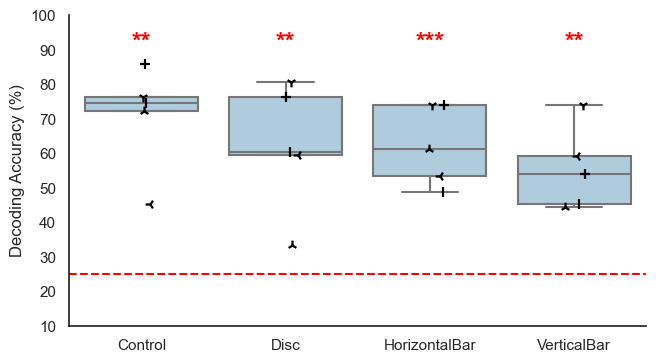

In [8]:
data=df[df['Stimuli']!='All']

plt.close()
g = sns.catplot(data=data,kind='box',showfliers=False,
            y='Accuracy',x='Stimuli',                
            order=['Control','Disc','HorizontalBar','VerticalBar'],
            hue='Condition',#hue_order=['GogglesON/12Hz','GogglesOFF/6Hz'],
            palette='Paired',
            height=4, aspect=1.7)

# Define custom markers for each subject
unique_subjects = data['Subjid'].unique()
markers = ['2', '3', '1', '+', '|']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

# Overlay each subject with its custom marker
for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='Accuracy', x='Stimuli',
        order=['Control', 'Disc', 'HorizontalBar', 'VerticalBar'],
        marker=marker, color='none', edgecolor='gray', linewidth=1.6, dodge=True, ax=g.ax, size=7
    )

# Remove the additional legends created by stripplot
handles, labels = g.ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

conditions = ['Control','Disc','HorizontalBar','VerticalBar']
for i, condition in enumerate(conditions):
    subset = data[data['Stimuli'] == condition]['Accuracy']
    t_stat, p_val = ttest_1samp(subset, 25, alternative='greater')
    
    # Determine significance level for annotation
    if p_val < 0.001:
        star = '***'
    elif p_val < 0.01:
        star = '**'
    elif p_val < 0.05:
        star = '*'
    else:
        star = ''
    
    # Print test result
    print(f"One-sample t-test for {condition}: t-statistic = {t_stat}, p-value = {p_val}")
    
    # Annotate the plot with the results
    g.ax.text(
        i, 90, f"{star}", horizontalalignment='center', color='red', fontsize=18, fontweight='bold'
    )


g.set(ylim=[10,100])
g.refline(y=25,color='red')
#sns.move_legend(g, "upper center")
#g._legend.set_title('')
g.set_ylabels('Decoding Accuracy (%)',fontsize=12)
g.set_xlabels('')
g._legend.remove()
plt.show()

In [206]:
data[data['Stimuli']=='HorizontalBar']

,Subjid,GogglesCondition,HasOffData,Stimuli,FeatureType,ElecGroup,FreqGroup,Session,Accuracy
403,1001,GogglesON,Yes,HorizontalBar,all_1to40,all,1to40,2.0,24.444444
653,1002,GogglesON,NO,HorizontalBar,all_1to40,all,1to40,2.0,33.333333
903,1004,GogglesON,NO,HorizontalBar,all_1to40,all,1to40,2.0,31.111111
1403,4006,GogglesON,Yes,HorizontalBar,all_1to40,all,1to40,3.0,33.333333
1903,4010,GogglesON,Yes,HorizontalBar,all_1to40,all,1to40,4.0,31.111111


In [40]:
ttest_1samp(data[(data['Subjid']!='TEST')&(data['Stimuli']=='Control')]['Accuracy'],25)

TtestResult(statistic=6.746419574765372, pvalue=0.0025163961978212322, df=4)

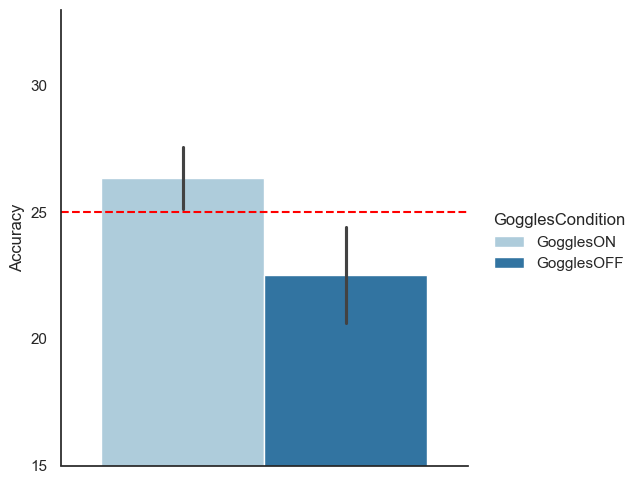

In [242]:
g = sns.catplot(data=df[df['FeatureType']=='occi_1to40'],kind='bar',
            hue='GogglesCondition',y='Accuracy',hue_order=['GogglesON','GogglesOFF'],
            errorbar='se',
            palette='Paired')
g.set(ylim=[15,33])
g.set(yticks=[15,20,25,30])
g.refline(y=25,color='red')


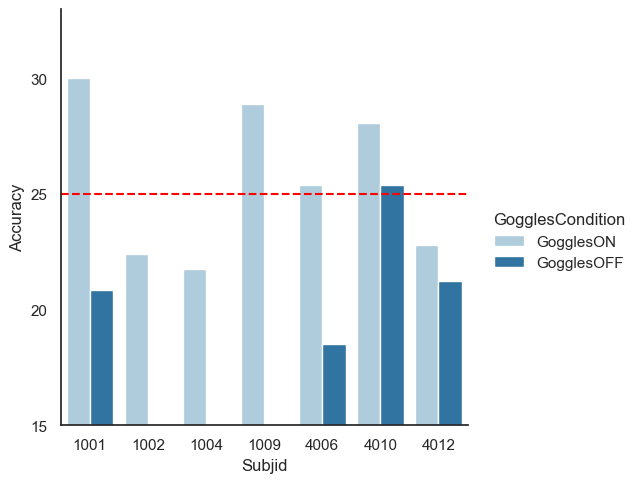

In [288]:
g = sns.catplot(data=df[df['FeatureType']=='occi_1to40'],kind='bar',
            hue='GogglesCondition',y='Accuracy',hue_order=['GogglesON','GogglesOFF'],
            x='Subjid',
            errorbar=None,
            palette='Paired')
g.set(ylim=[15,33])
g.set(yticks=[15,20,25,30])
g.refline(y=25,color='red')
